# 1- Import Libraries and Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
import os

# 2- Data Preparation

In [6]:
#os.listdir("/kaggle/input/animals10/raw-img/elefante")

In [7]:
file_path = "/kaggle/input/animals10/raw-img"

## 2.1 - Normalisation and rescaling for train and test data and validation data

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [9]:
train_data = train_datagen.flow_from_directory(file_path,
                                              target_size = (224,224), 
                                              batch_size = 32,
                                              class_mode = 'categorical') 


test_data = test_datagen.flow_from_directory(file_path,
                                              target_size = (224,224),
                                              batch_size = 32,
                                              class_mode = 'categorical') 

Found 26179 images belonging to 10 classes.
Found 26179 images belonging to 10 classes.


# 3- CNN Model using tensorflow

## 3.1- Model creation and compiling

In [10]:
model = Sequential([
    
    Input(shape = (224, 224, 3)),
    Conv2D(16, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(256, activation = "relu"),
    Dropout(0.2),
    Dense(512, activation = "relu"),
    Dropout(0.2),

    # output Layer

    Dense(train_data.num_classes, activation = "softmax")
    
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,953,002 (18.89 MB)

 Trainable params: 4,953,002 (18.89 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer= "adam", loss= "categorical_crossentropy",metrics= ["accuracy"])

## 3.2 Model training

In [12]:
model.fit(train_data,
          epochs = 10, 
          validation_data = test_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


819/819 ━━━━━━━━━━━━━━━━━━━━ 255s 299ms/step - accuracy: 0.3071 - loss: 1.9512 - val_accuracy: 0.5480 - val_loss: 1.3101
Epoch 2/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 141s 171ms/step - accuracy: 0.5660 - loss: 1.2739 - val_accuracy: 0.6873 - val_loss: 0.9441
Epoch 3/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 145s 176ms/step - accuracy: 0.7496 - loss: 0.7292 - val_accuracy: 0.8484 - val_loss: 0.4687
Epoch 5/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 144s 176ms/step - accuracy: 0.8203 - loss: 0.5289 - val_accuracy: 0.9107 - val_loss: 0.3031
Epoch 6/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 139s 169ms/step - accuracy: 0.8741 - loss: 0.3783 - val_accuracy: 0.9444 - val_loss: 0.1845
Epoch 7/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 133s 161ms/step - accuracy: 0.8969 - loss: 0.2955 - val_accuracy: 0.9663 - val_loss: 0.1175
Epoch 8/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 132s 160ms/step - accuracy: 0.9251 - loss: 0.2220 - val_accuracy: 0.9707 - val_loss: 0.0978
Epoch 9/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 131s 159ms/step - accuracy: 0.9322 - loss: 0.19

In [13]:
img = cv2.imread("/kaggle/input/animals10/raw-img/elefante/OIP-eH_1Fbn8w58FGBxN1ZwuAgHaFU.jpeg")


In [14]:
#img = cv2.imread('/kaggle/input/animals10/raw-img/cavallo/OIP---sK_NCo5VFiDavIY-pUdgHaFB.jpeg')
#results = model.predict(img)

#plt.figure(figsize=(12, 8))
#plt.imshow(results[0].plot()[:, :, ::-1])
#plt.axis('off')
#plt.show()

#img.shape

(204, 300, 3)

## 3.3 Model Testing

In [15]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image
img_path = "/kaggle/input/animals10/raw-img/elefante/OIP-eH_1Fbn8w58FGBxN1ZwuAgHaFU.jpeg"
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Scale the image (same as during training)
img_array = img_array / 255.0

# Add an extra dimension to match the model's input shape
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction
predictions = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)

print(f'Predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
Predicted class: [2]


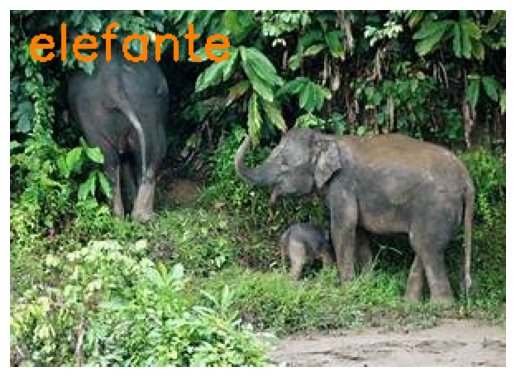

Predicted class: elefante


In [16]:
# Map the predicted class number to the class name
class_names = list(train_data.class_indices.keys())  # Get class names from the training data
predicted_class_name = class_names[predicted_class[0]]

# Load the image using OpenCV for annotation
img_cv2 = cv2.imread(img_path)
img_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Add the predicted class name to the image
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (255, 127, 0)  # Red color
thickness = 2
cv2.putText(img_cv2, predicted_class_name, (10, 30) , font, font_scale, font_color, thickness )

# Display the image with the predicted class name
plt.imshow(img_cv2)
plt.axis('off')  # Hide axes
plt.show()

print(f'Predicted class: {predicted_class_name}')


# 4- Yolo Model

In [24]:
!pip install ultralytics

In [25]:
from ultralytics import YOLO
from sklearn.model_selection import train_test_split
import shutil

## 4.1- Data preparation

In [26]:
# Path to the original dataset
dataset_path = "/kaggle/input/animals10/raw-img"
output_path = "/kaggle/working/animals10"

# Create the correct directory structure
for split in ["train", "val", "test"]:
    for class_name in os.listdir(dataset_path):
        os.makedirs(os.path.join(output_path, split, class_name), exist_ok=True)

# Move images to the correct directories
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        train_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)
        train_imgs, val_imgs = train_test_split(train_imgs, test_size=0.1, random_state=42)

        # Copy images to the respective folders
        for img in train_imgs:
            shutil.copy(os.path.join(class_path, img), os.path.join(output_path, "train", class_name, img))
        for img in val_imgs:
            shutil.copy(os.path.join(class_path, img), os.path.join(output_path, "val", class_name, img))
        for img in test_imgs:
            shutil.copy(os.path.join(class_path, img), os.path.join(output_path, "test", class_name, img))

print("Dataset organized!")


Dataset organized!


## 4-2 YOLO training

In [27]:
model_yolo = YOLO("yolov8n-cls.pt")
model_yolo.train(data= output_path , epochs=10, batch=32, device="cuda")

Ultralytics 8.3.93 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/kaggle/working/animals10, epochs=10, time=None, patience=100, batch=32, imgsz=224, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 5.35M/5.35M [00:00<00:00, 70.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/animals10/train... 18841 images, 0 corrupt: 100%|██████████| 18841/18841 [00:11<00:00, 1694.44it/s]


train: New cache created: /kaggle/working/animals10/train.cache


val: Scanning /kaggle/working/animals10/val... 2097 images, 0 corrupt: 100%|██████████| 2097/2097 [00:01<00:00, 1293.61it/s]

val: New cache created: /kaggle/working/animals10/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 4 dataloader workers
Logging results to runs/classify/train3
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10       0.4G      2.385         32        224:   1%|          | 5/589 [00:01<02:11,  4.45it/s]

       1/10      0.42G      2.384         32        224:   2%|▏         | 9/589 [00:02<01:19,  7.25it/s]
100%|██████████| 755k/755k [00:00<00:00, 15.4MB/s]  224:   2%|▏         | 10/589 [00:02<01:18,  7.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [00:03<00:00,  8.65it/s]

                   all      0.934      0.997



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [00:03<00:00,  9.49it/s]

                   all      0.944      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [00:03<00:00,  9.33it/s]

                   all      0.948      0.997



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [00:03<00:00,  9.46it/s]

                   all      0.956      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [00:03<00:00,  9.34it/s]

                   all      0.951      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [00:03<00:00,  9.32it/s]

                   all      0.958      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [00:03<00:00,  9.74it/s]

                   all      0.969      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [00:03<00:00,  9.59it/s]

                   all      0.966      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [00:03<00:00,  9.58it/s]

                   all      0.967      0.999



      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.523G     0.1012         25        224: 100%|██████████| 589/589 [01:01<00:00,  9.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [00:03<00:00,  9.44it/s]

                   all      0.969      0.999



10 epochs completed in 0.184 hours.
Optimizer stripped from runs/classify/train3/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train3/weights/best.pt, 3.0MB

Validating runs/classify/train3/weights/best.pt...
Ultralytics 8.3.93 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs
train: /kaggle/working/animals10/train... found 18841 images in 10 classes ✅ 
val: /kaggle/working/animals10/val... found 2097 images in 10 classes ✅ 
test: /kaggle/working/animals10/test... found 5241 images in 10 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 33/33 [00:03<00:00,  9.06it/s]
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all      0.969      0.998
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x798cb97a55d0>
curves: []
curves_results: []
fitness: 0.9837863743305206
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9694802165031433, 'metrics/accuracy_top5': 0.998092532157898, 'fitness': 0.9837863743305206}
save_dir: PosixPath('runs/classify/train3')
speed: {'preprocess': 0.09003006342384598, 'inference': 0.26314233762645767, 'loss': 0.00036203481091727843, 'postprocess': 0.00046769670956014423}
task: 'classify'
top1: 0.9694802165031433
top5: 0.998092532157898

## 4-3. Yolo testing


0: 224x224 scoiattolo 1.00, cane 0.00, gatto 0.00, pecora 0.00, cavallo 0.00, 3.3ms
Speed: 13.5ms preprocess, 3.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


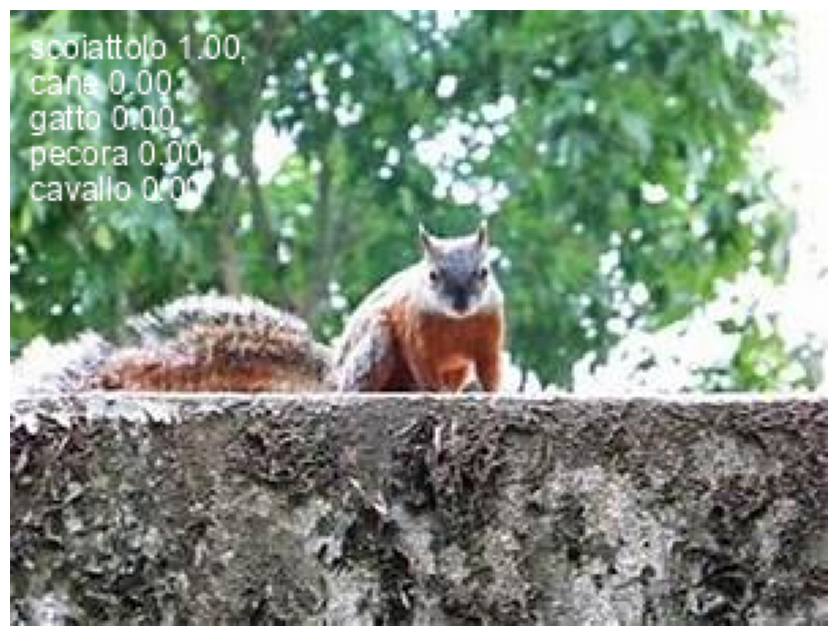

In [28]:
img = cv2.imread('/kaggle/input/animals10/raw-img/scoiattolo/OIP--AAQXm1r1q9pQFMH6vjkhwHaFk.jpeg')
results = model_yolo.predict(img, conf=0.5)

plt.figure(figsize=(12, 8))
plt.imshow(results[0].plot()[:, :, ::-1])
plt.axis('off')
plt.show()